# Performance Metrics

In this notebook we explore several performance metrics. We use the well-known Titanic data set.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import mglearn
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report)

In [24]:
titanic = pd.read_csv("titanic.csv")
#Dropping unwanted columns:
titanic = titanic.drop(['Name',"Ticket","Cabin","Embarked"], axis='columns')

#Creating dummy variable for sex:
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

#We will also drop all rows that contain NaN-values:
titanic = titanic.dropna()

X = titanic.drop(['Survived'], axis='columns')
y = titanic["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y)

We look at the performance of Naive Bayes classifiers

In [25]:
clf = GaussianNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Accuracy: \n{}\n".format(clf.score(X_test,y_test)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))


Confusion matrix:  
[[89 17]
 [21 52]]

Accuracy: 
0.7877094972067039

Precision: 
0.7536231884057971

Recall: 
0.7123287671232876

F1: 
0.732394366197183


In [4]:
#(87+56) / (87+19+17+56)

0.7988826815642458

In [5]:
#56/(56+19)

0.7466666666666667

In [6]:
#56/(56+17)

0.7671232876712328

From the sklearn documentation: 

"By definition a confusion matrix C is such that C(i,j) is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is C(1,1) and false positives is C(0,1)."

So the structure of confusion matrix shown above is

    [[TN FP]

     [FN TP]]

Now looking at the ROC curve:

Area under curve: 
0.7759757043163609


array([2, 1, 0], dtype=int64)

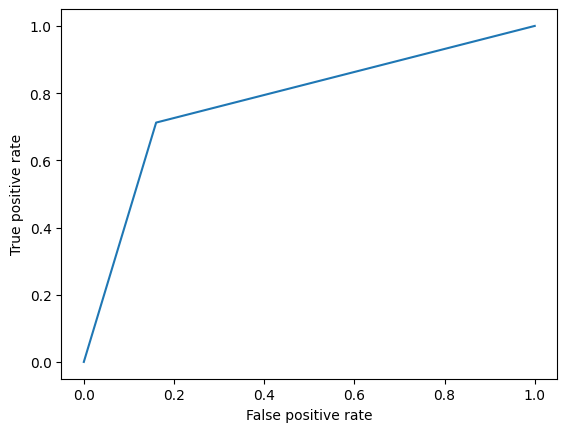

In [26]:
fpr,tpr,thresh = roc_curve(y_test,clf.predict(X_test))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
print("Area under curve: \n{}".format(roc_auc_score(y_test,clf.predict(X_test))) )
thresh

Precision-Recall curve:

array([0, 1], dtype=int64)

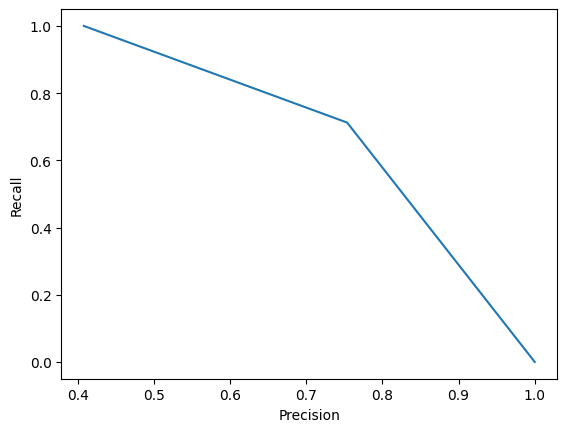

In [27]:
prec,rec,thresh = precision_recall_curve(y_test,clf.predict(X_test))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(prec,rec)
thresh

At last, let's try to tune the prior of the Naive Bayes classifier such that we get a very high Recall (the Precision-Recall curve shows that this is possible - at the expence of a very low Precision):

In [28]:
clf = GaussianNB(priors=[0.01,0.99])
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Accuracy: \n{}\n".format(clf.score(X_test,y_test)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))


Confusion matrix:  
[[  5 101]
 [  1  72]]

Accuracy: 
0.4301675977653631

Precision: 
0.4161849710982659

Recall: 
0.9863013698630136

F1: 
0.5853658536585366


## Confusion Matrix

In [30]:
clf = GaussianNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

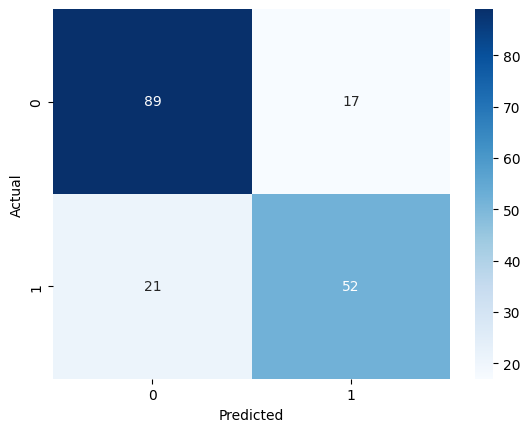

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [34]:
pip install tensorflow

     ---------------------------------------- 0.0/276.6 MB ? eta -:--:--
     ---------------------------------------- 0.3/276.6 MB 5.8 MB/s eta 0:00:48
     ---------------------------------------- 0.7/276.6 MB 7.5 MB/s eta 0:00:37
     ---------------------------------------- 1.2/276.6 MB 8.3 MB/s eta 0:00:34
     ---------------------------------------- 1.8/276.6 MB 9.6 MB/s eta 0:00:29
     --------------------------------------- 2.4/276.6 MB 10.1 MB/s eta 0:00:28
     --------------------------------------- 3.2/276.6 MB 11.4 MB/s eta 0:00:25
      -------------------------------------- 4.2/276.6 MB 12.8 MB/s eta 0:00:22
      -------------------------------------- 5.0/276.6 MB 13.8 MB/s eta 0:00:20
      -------------------------------------- 5.7/276.6 MB 13.5 MB/s eta 0:00:21
      -------------------------------------- 7.0/276.6 MB 15.0 MB/s eta 0:00:18
     - ------------------------------------- 7.3/276.6 MB 15.6 MB/s eta 0:00:18
     - ------------------------------------- 8.


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import tensorflow as tf
y_test_tf = tf.constant(y_test, dtype=tf.int32)
predictions_tf = tf.constant(predictions, dtype=tf.int32)
confusion_matrix = tf.math.confusion_matrix(y_test_tf, predictions_tf).numpy()
print(confusion_matrix)


[[89 17]
 [21 52]]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

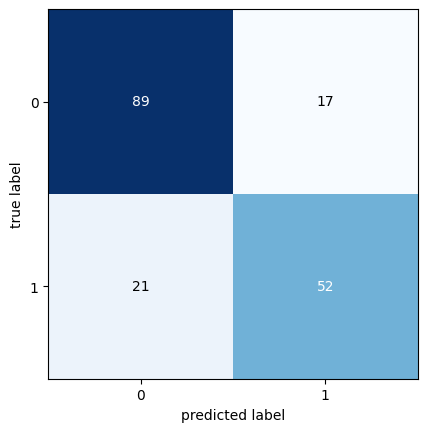

In [42]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)
plot_confusion_matrix(conf_mat=mat)


## Optimizing for recall in cross validation grid search

We could actually perform a gridsearch that automatically optimizes for any performance metric (if no "scoring"-parameter is provided, it optimizes for accuracy):

In [43]:
parameters = {'priors': [[0.01,0.99],[0.1,0.9]]}
NB_grid_search = GridSearchCV(GaussianNB(), parameters, cv=5, return_train_score=True, scoring="recall")
NB_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [[0.01, 0.99], [0.1, 0.9]]},
             return_train_score=True, scoring='recall')

In [44]:
predictions = NB_grid_search.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Accuracy: \n{}\n".format(clf.score(X_test,y_test)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))

Confusion matrix:  
[[  5 101]
 [  1  72]]

Accuracy: 
0.7877094972067039

Precision: 
0.4161849710982659

Recall: 
0.9863013698630136

F1: 
0.5853658536585366
